<a href="https://colab.research.google.com/github/vineet891/FODS-Assignment/blob/main/Assignment2/FODS_Assignment2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FoDS Assignment

## Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

import tqdm
from tqdm import notebook

## Data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/3-1/FoDS/FODS Assignment2/FoDS-Assignment-2.csv')
df = df.dropna()
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,4,1.75,2120.0,7420,1.0,0,0,4,7,1060.0,1060,1540,7420,453000.0
1,4,2.50,2180.0,9861,2.0,0,2,3,8,2180.0,0,2390,9761,480000.0
2,3,1.50,1540.0,9800,1.0,0,0,3,7,1010.0,530,1600,8250,180500.0
3,3,3.50,2380.0,6250,2.0,0,3,3,8,1670.0,710,2540,4010,495000.0
4,4,2.50,2230.0,8500,2.0,0,0,3,8,2230.0,0,2270,8770,325000.0


### Train-Test Split

In [ ]:
# Train-Test Split
# split the data set into 70:30 train:test 

split_index = int(0.7*len(df))

data = df.values
X = data[:,:-1]
y = data[:,-1]

train_X = X[:split_index]
train_y = y[:split_index]

test_X = X[split_index:]
test_y = y[split_index:]

In [ ]:
train_X.shape

(802, 13)

In [ ]:
np.isnan(train_X)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Model

In [ ]:
class LinearRegression():

    def __init__(self):
        self.w = None

    def polynomial(self, X):   
        '''
        Evaluates the polynomial by doing a dot product of the weights with the feature variables.
        ''' 
        return np.dot(X, self.w.T) 
    
    def mean_squared_error(self, y_pred, y):
        '''
        Evaluates the Mean Squared error of the predicted values by comparing it with the true values.
        Parameters:
            y_pred: Predicted values.
            y: True output values.
        '''
        return np.sum((y-y_pred)**2)/y.shape[0]

    def grad_w(self, x, y):    
        '''
        Calculates the gradient of the weight values.
        Parameters:
            x: Training point
            y:  
        '''
        y_pred = self.polynomial(x)  
        m = x.shape[0]
        return (1/m)*x.T.dot(y_pred - y)
        

    def predict(self, X):
        '''
        Evaluates the polynomial function value of the given data.
        Parameters:
            X: testing sample
        '''
        return self.polynomial(X)

    def evaluate(self, x_test, y_test):
        '''
        Evaluates the model for a given testing data
        Parameters:
            x_test: testing samples
            y_test: testing labels
        '''
        
        y_pred = self.predict(x_test)
        test_loss = self.mean_squared_error(y_pred, y_test)
        print("Testing MSE is ", test_loss)
        rmse_loss = np.sqrt(test_loss)
        print("Testing RMSE is ", rmse_loss)
        return  rmse_loss

    def fit(self, X,Y, epochs = 1, learning='GD', learning_rate = 1, display_loss=False, printValues=False):
        '''
          Performs Gradient descent or Stochastic Gradient descent as mentioned.
          Paremeters-
            X - training features
            Y - training target attributes
            epochs - number of iterations the gradient descent should run
            learning - learning rate for gradient update
            display_loss, printValues -  printing loss in each epoch

        '''
        count=0
        m = X.shape[0]

        self.w = np.random.randn(X.shape[1],)

        if display_loss:
            loss={}
            accuracy={}
        
        print("Training...")

        for i in tqdm.notebook.tqdm(range(epochs), total=epochs, unit="epoch"):
            
            dw = 0
            if learning == 'GD':

                y_estimated = self.predict(X)
                
                dw = self.grad_w(X, Y)
                self.w = self.w - (learning_rate * dw) 
                
                error = y_estimated - Y
                cost = (1 / 2 * m) * np.sum(error ** 2)             

            if learning == 'SGD':
                randInt = np.random.randint(0,X.shape[0])
                x = X[randInt, :]
                y = Y[randInt]
                Y_pred = self.predict(X)
                dw = x*(Y_pred[randInt] - y) 
                error = Y_pred - Y

                self.w -= learning_rate * dw

            if display_loss:
                Y_pred = self.polynomial(X)   
                loss[i] = self.mean_squared_error(Y_pred,Y)
                if i%50==0:
                    print('Epoch:', i,  ' RMSE Loss :', np.sqrt(loss[i]))

        if display_loss and count%50==0:
            plt.subplot(2, 1, 1)
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Root Mean Squared Error')
            
            plt.show()
        count=count+1

        print("Testing")

## Training

Training...


  0%|          | 0/100000 [00:00<?, ?epoch/s]

Epoch: 0  RMSE Loss : 604305.4580024198
Epoch: 50  RMSE Loss : 533579.3540904493
Epoch: 100  RMSE Loss : 510331.21482880675
Epoch: 150  RMSE Loss : 490159.8366263007
Epoch: 200  RMSE Loss : 471243.2465224249
Epoch: 250  RMSE Loss : 453446.1535761513
Epoch: 300  RMSE Loss : 436713.56530049647
Epoch: 350  RMSE Loss : 420996.1009616284
Epoch: 400  RMSE Loss : 406246.3974664087
Epoch: 450  RMSE Loss : 392418.81513837597
Epoch: 500  RMSE Loss : 379469.3074453127
Epoch: 550  RMSE Loss : 367355.31049046176
Epoch: 600  RMSE Loss : 356035.64626438427
Epoch: 650  RMSE Loss : 345470.43984939967
Epoch: 700  RMSE Loss : 335621.0508071534
Epoch: 750  RMSE Loss : 326450.0186847276
Epoch: 800  RMSE Loss : 317921.0222295255
Epoch: 850  RMSE Loss : 309998.85154034174
Epoch: 900  RMSE Loss : 302649.39202540176
Epoch: 950  RMSE Loss : 295839.61871201935
Epoch: 1000  RMSE Loss : 289537.59917992103
Epoch: 1050  RMSE Loss : 283712.5031905648
Epoch: 1100  RMSE Loss : 278334.61697164905
Epoch: 1150  RMSE Loss 

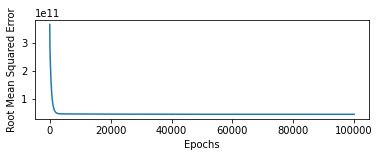

Testing
Testing MSE is  133603269947.31831
Testing RMSE is  365517.81071148685


365517.81071148685

In [ ]:
GD1 = LinearRegression()
GD1.fit(train_X, train_y, epochs = 100000, learning='GD', display_loss=True, learning_rate=0.0000000001)
GD1.evaluate(test_X , test_y)

Training...


  0%|          | 0/100000 [00:00<?, ?epoch/s]

Epoch: 0  RMSE Loss : 608627.7872282286
Epoch: 50  RMSE Loss : 571305.159682059
Epoch: 100  RMSE Loss : 563173.2684206875
Epoch: 150  RMSE Loss : 556665.2586074385
Epoch: 200  RMSE Loss : 551257.0763942319
Epoch: 250  RMSE Loss : 546673.0415140608
Epoch: 300  RMSE Loss : 542706.216219779
Epoch: 350  RMSE Loss : 539201.4853546617
Epoch: 400  RMSE Loss : 536042.9953661793
Epoch: 450  RMSE Loss : 533144.450901964
Epoch: 500  RMSE Loss : 530441.7026406542
Epoch: 550  RMSE Loss : 527887.1340518564
Epoch: 600  RMSE Loss : 525445.4376619508
Epoch: 650  RMSE Loss : 523090.45195620926
Epoch: 700  RMSE Loss : 520802.8009297274
Epoch: 750  RMSE Loss : 518568.13722448307
Epoch: 800  RMSE Loss : 516375.8370538398
Epoch: 850  RMSE Loss : 514218.03213545005
Epoch: 900  RMSE Loss : 512088.8923781584
Epoch: 950  RMSE Loss : 509984.0947954716
Epoch: 1000  RMSE Loss : 507900.43053150276
Epoch: 1050  RMSE Loss : 505835.5142108834
Epoch: 1100  RMSE Loss : 503787.56903998484
Epoch: 1150  RMSE Loss : 501755.

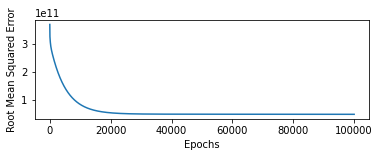

Testing
Testing MSE is  141381007407.52866
Testing RMSE is  376006.6587276463


376006.6587276463

In [ ]:
GD2 = LinearRegression()
GD2.fit(train_X, train_y, epochs = 100000, learning='GD', display_loss=True, learning_rate=0.00000000001)
GD2.evaluate(test_X , test_y)

Training...


  0%|          | 0/1000000 [00:00<?, ?epoch/s]

Streaming output truncated to the last 5000 lines.
Epoch: 750000  RMSE Loss : 324701.3172974702
Epoch: 750050  RMSE Loss : 324687.5887733543
Epoch: 750100  RMSE Loss : 324679.0806058853
Epoch: 750150  RMSE Loss : 324685.3446329623
Epoch: 750200  RMSE Loss : 324665.1255098108
Epoch: 750250  RMSE Loss : 324649.0022051489
Epoch: 750300  RMSE Loss : 324649.3443607081
Epoch: 750350  RMSE Loss : 324649.7937553887
Epoch: 750400  RMSE Loss : 324653.95778074895
Epoch: 750450  RMSE Loss : 324657.95705947443
Epoch: 750500  RMSE Loss : 324603.0163106881
Epoch: 750550  RMSE Loss : 324596.4234576987
Epoch: 750600  RMSE Loss : 324593.56595996016
Epoch: 750650  RMSE Loss : 324580.09396141634
Epoch: 750700  RMSE Loss : 324575.09029851283
Epoch: 750750  RMSE Loss : 324564.44272934645
Epoch: 750800  RMSE Loss : 324562.11180625705
Epoch: 750850  RMSE Loss : 324547.43460744596
Epoch: 750900  RMSE Loss : 324552.30079371604
Epoch: 750950  RMSE Loss : 324542.83766957506
Epoch: 751000  RMSE Loss : 324523.48162

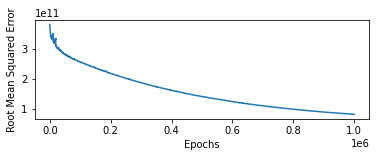

Testing
Testing MSE is  226110556473.63428
Testing RMSE is  475510.83738820744


475510.83738820744

In [ ]:
GD3 = LinearRegression()
GD3.fit(train_X, train_y, epochs = 1000000, learning='SGD', display_loss=True, learning_rate=0.0000000000001)
GD3.evaluate(test_X , test_y)

Training...


  0%|          | 0/100000 [00:00<?, ?epoch/s]

Epoch: 0  RMSE Loss : 611026.4319441412
Epoch: 50  RMSE Loss : 527209.9027358801
Epoch: 100  RMSE Loss : 503792.5502572043
Epoch: 150  RMSE Loss : 483984.73649812705
Epoch: 200  RMSE Loss : 465439.7523661081
Epoch: 250  RMSE Loss : 447998.59535365243
Epoch: 300  RMSE Loss : 431605.8000718931
Epoch: 350  RMSE Loss : 416212.5397552392
Epoch: 400  RMSE Loss : 401772.00897845754
Epoch: 450  RMSE Loss : 388239.0859372584
Epoch: 500  RMSE Loss : 375570.2042026742
Epoch: 550  RMSE Loss : 363723.24659422645
Epoch: 600  RMSE Loss : 352657.4531196938
Epoch: 650  RMSE Loss : 342333.3429996642
Epoch: 700  RMSE Loss : 332712.6509013833
Epoch: 750  RMSE Loss : 323758.27720028424
Epoch: 800  RMSE Loss : 315434.2517340284
Epoch: 850  RMSE Loss : 307705.71015030786
Epoch: 900  RMSE Loss : 300538.88160067727
Epoch: 950  RMSE Loss : 293901.0862224664
Epoch: 1000  RMSE Loss : 287760.7406013908
Epoch: 1050  RMSE Loss : 282087.3692364385
Epoch: 1100  RMSE Loss : 276851.6199473625
Epoch: 1150  RMSE Loss : 27

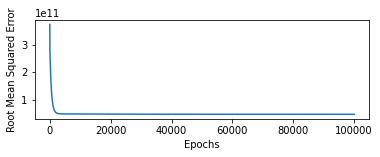

Testing
Testing MSE is  133592454794.47632
Testing RMSE is  365503.0161222699


365503.0161222699

In [ ]:
GD5 = LinearRegression()
GD5.fit(train_X, train_y, epochs = 100000, learning='GD', display_loss=True, learning_rate=0.0000000001)
GD5.evaluate(test_X , test_y)

Training...


  0%|          | 0/100000 [00:00<?, ?epoch/s]

Epoch: 0  RMSE Loss : 590507.8365696366
Epoch: 50  RMSE Loss : 528136.4561836601
Epoch: 100  RMSE Loss : 505831.7109427775
Epoch: 150  RMSE Loss : 485950.19564028876
Epoch: 200  RMSE Loss : 467281.8895007656
Epoch: 250  RMSE Loss : 449720.3932824164
Epoch: 300  RMSE Loss : 433212.4761128245
Epoch: 350  RMSE Loss : 417709.2322739616
Epoch: 400  RMSE Loss : 403163.6854562217
Epoch: 450  RMSE Loss : 389530.5523573103
Epoch: 500  RMSE Loss : 376766.117668257
Epoch: 550  RMSE Loss : 364828.12654945656
Epoch: 600  RMSE Loss : 353675.69088188687
Epoch: 650  RMSE Loss : 343269.2095420971
Epoch: 700  RMSE Loss : 333570.3028733758
Epoch: 750  RMSE Loss : 324541.7612161413
Epoch: 800  RMSE Loss : 316147.5070096715
Epoch: 850  RMSE Loss : 308352.5696138034
Epoch: 900  RMSE Loss : 301123.07164718537
Epoch: 950  RMSE Loss : 294426.22532232414
Epoch: 1000  RMSE Loss : 288230.3369994369
Epoch: 1050  RMSE Loss : 282504.8179992778
Epoch: 1100  RMSE Loss : 277220.19962193497
Epoch: 1150  RMSE Loss : 2723

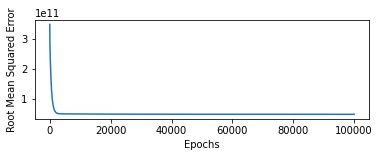

Testing
Testing MSE is  133542156999.65364
Testing RMSE is  365434.20337956003


365434.20337956003

In [ ]:
GD6 = LinearRegression()
GD6.fit(train_X, train_y, epochs = 100000, learning='GD', display_loss=True, learning_rate=1e-10)
GD6.evaluate(test_X , test_y)

Training...


  0%|          | 0/1000000 [00:00<?, ?epoch/s]

Streaming output truncated to the last 5000 lines.
Epoch: 750000  RMSE Loss : 216775.6247443125
Epoch: 750050  RMSE Loss : 216775.6246413131
Epoch: 750100  RMSE Loss : 216775.62453831366
Epoch: 750150  RMSE Loss : 216775.6244353143
Epoch: 750200  RMSE Loss : 216775.62433231488
Epoch: 750250  RMSE Loss : 216775.62422931544
Epoch: 750300  RMSE Loss : 216775.62412631605
Epoch: 750350  RMSE Loss : 216775.62402331666
Epoch: 750400  RMSE Loss : 216775.62392031724
Epoch: 750450  RMSE Loss : 216775.62381731783
Epoch: 750500  RMSE Loss : 216775.62371431844
Epoch: 750550  RMSE Loss : 216775.62361131905
Epoch: 750600  RMSE Loss : 216775.62350831964
Epoch: 750650  RMSE Loss : 216775.62340532022
Epoch: 750700  RMSE Loss : 216775.62330232083
Epoch: 750750  RMSE Loss : 216775.62319932142
Epoch: 750800  RMSE Loss : 216775.62309632203
Epoch: 750850  RMSE Loss : 216775.6229933226
Epoch: 750900  RMSE Loss : 216775.62289032323
Epoch: 750950  RMSE Loss : 216775.62278732384
Epoch: 751000  RMSE Loss : 216775

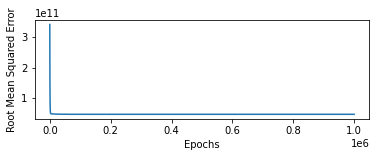

Testing
Testing MSE is  132263980213.48369
Testing RMSE is  363681.15185349336


363681.15185349336

In [ ]:
GD7 = LinearRegression()
GD7.fit(train_X, train_y, epochs = 1000000, learning='GD', display_loss=True, learning_rate=1e-10)
GD7.evaluate(test_X , test_y)

Training...


  0%|          | 0/1000000 [00:00<?, ?epoch/s]

Streaming output truncated to the last 5000 lines.
Epoch: 750000  RMSE Loss : 216773.2575391998
Epoch: 750050  RMSE Loss : 216773.25733322825
Epoch: 750100  RMSE Loss : 216773.2571272567
Epoch: 750150  RMSE Loss : 216773.25692128515
Epoch: 750200  RMSE Loss : 216773.2567153136
Epoch: 750250  RMSE Loss : 216773.25650934203
Epoch: 750300  RMSE Loss : 216773.2563033705
Epoch: 750350  RMSE Loss : 216773.25609739893
Epoch: 750400  RMSE Loss : 216773.2558914274
Epoch: 750450  RMSE Loss : 216773.2556854558
Epoch: 750500  RMSE Loss : 216773.2554794843
Epoch: 750550  RMSE Loss : 216773.25527351274
Epoch: 750600  RMSE Loss : 216773.25506754118
Epoch: 750650  RMSE Loss : 216773.25486156967
Epoch: 750700  RMSE Loss : 216773.25465559814
Epoch: 750750  RMSE Loss : 216773.2544496266
Epoch: 750800  RMSE Loss : 216773.25424365507
Epoch: 750850  RMSE Loss : 216773.25403768354
Epoch: 750900  RMSE Loss : 216773.25383171203
Epoch: 750950  RMSE Loss : 216773.2536257405
Epoch: 751000  RMSE Loss : 216773.2534

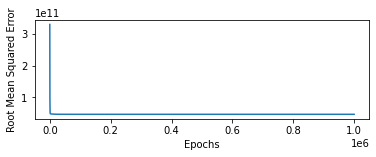

Testing
Testing MSE is  132261779130.85857
Testing RMSE is  363678.12572501326


363678.12572501326

In [ ]:
GD8 = LinearRegression()
GD8.fit(train_X, train_y, epochs = 1000000, learning='GD', display_loss=True, learning_rate=2e-10)
GD8.evaluate(test_X , test_y)